#### Logistic Regression

Metrics:

Akurasi = (TP + TN) / N

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(x,y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [4]:
model = LogisticRegression(solver = 'liblinear', random_state=2024)

In [5]:
model.fit(x,y)

LogisticRegression(random_state=2024, solver='liblinear')

In [6]:
model.classes_

array([0, 1])

model di atas classnya binary

In [7]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [8]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [12]:
model.predict_proba(x)[:,1]

array([0.25997843, 0.37024476, 0.4959368 , 0.62214451, 0.73371907,
       0.82178499, 0.88527921, 0.92813018, 0.95577487, 0.97309431])

In [10]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [11]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [13]:
model.score(x,y)

0.9

In [14]:
y_pred = model.predict(x)

In [15]:
confusion_matrix(y, y_pred)

array([[3, 1],
       [0, 6]], dtype=int64)

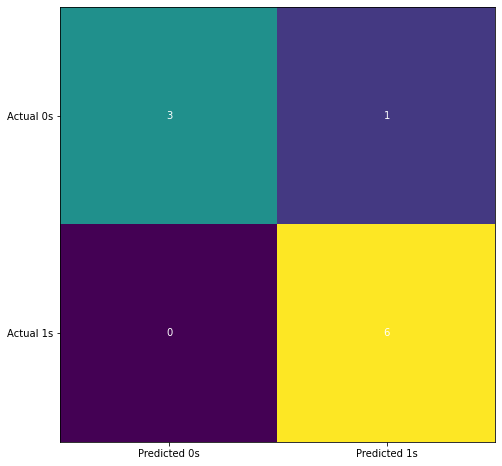

In [17]:
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [21]:
TP, FP, FN, TN = 6, 1, 0, 3

acc = (TP+TN)/(TP+FP+TN+FN)
pre = (TP)/(TP+FP)
re = (TP)/(TP+FN)
f1 = (TP+TP)/(TP+TP+FP+FN)

print('Accuracy : ', acc,'\nPrecision : ', pre, '\nRecall : ', re, '\nF1-Score : ', f1)

Accuracy :  0.9 
Precision :  0.8571428571428571 
Recall :  1.0 
F1-Score :  0.9230769230769231


In [18]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [22]:
model_tuned = LogisticRegression(solver = 'liblinear', C=10, random_state=2024)
model_tuned.fit(x,y)

LogisticRegression(C=10, random_state=2024, solver='liblinear')

In [23]:
print(model_tuned.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [24]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [25]:
y_pred_tuned = model_tuned.predict(x)

In [26]:
confusion_matrix(y, y_pred_tuned)

array([[4, 0],
       [0, 6]], dtype=int64)

In [27]:
print(classification_report(y, y_pred_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



#### Logistic Regression for Handwriting Recognition

In [28]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
x, y = load_digits(return_X_y=True)

In [30]:
print(x, '\n\n', y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 

 [0 1 2 ... 8 9 8]


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2024)

In [32]:
x_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  1., 11., ..., 10.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ..., 16.,  2.,  0.],
       [ 0.,  1., 13., ..., 12.,  5.,  0.],
       [ 0.,  0.,  9., ...,  1.,  0.,  0.]])

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
model = LogisticRegression(solver = 'liblinear', C=0.05, multi_class='ovr', random_state=2024)
model.fit(x_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

In [35]:
model.score(x_train, y_train)

0.9680772086117297

In [36]:
model.score(x_test, y_test)

0.9444444444444444

In [37]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

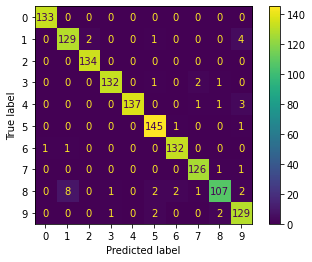

In [39]:
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

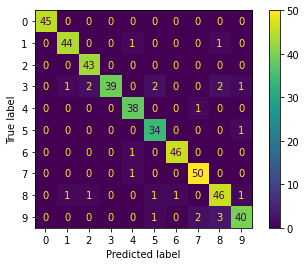

In [40]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [44]:
print('Train Set\n',classification_report(y_train, y_pred_train))
print('\n\nTest Set\n', classification_report(y_test, y_pred_test))

Train Set
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       133
           1       0.93      0.95      0.94       136
           2       0.99      1.00      0.99       134
           3       0.99      0.97      0.98       136
           4       1.00      0.96      0.98       142
           5       0.96      0.99      0.97       147
           6       0.98      0.99      0.98       134
           7       0.97      0.98      0.98       128
           8       0.96      0.87      0.91       123
           9       0.92      0.96      0.94       134

    accuracy                           0.97      1347
   macro avg       0.97      0.97      0.97      1347
weighted avg       0.97      0.97      0.97      1347



Test Set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.96      0.96        46
           2       0.93      1.00      0.97        43
 

#### KNN

In [46]:
# First Feature
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']

# Second Feature
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

#Label or target variable
play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

print(len(weather), len(temp), len(play))

14 14 14


In [47]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_enc = le.fit_transform(weather) # var 1
temp_enc = le.fit_transform(temp) # var 2
play_enc = le.fit_transform(play) # var target
print(weather_enc)
print(temp_enc)
print(play_enc)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [49]:
features = list(zip(weather_enc, temp_enc))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

weather:
 + sunny : 2
 + rainy : 1
 + overcast : 0
 
temp:
 + mild : 2
 + hot : 1
 + cool : 0
 
play:
+ yes : 1
+ no : 0

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
model = KNeighborsClassifier(n_neighbors=3)

x = features
y = play_enc

model.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [54]:
predicted = model.predict([[1, 1]]) # [1,1] berarti rainy dan hot

print(predicted)

[0]


In [55]:
y_pred = model.predict(x)

In [56]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



#### KNN With MultiClass

In [61]:
from sklearn.datasets import load_wine

wine = load_wine()
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [62]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [63]:
wine['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [64]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [69]:
wine['data'].shape

(178, 13)

In [70]:
wine['target'].shape

(178,)

In [77]:
import pandas as pd
x = pd.DataFrame(wine['data'], columns=wine['feature_names'])
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [76]:
y = pd.DataFrame(wine['target'], columns=['kultivar'])
y

,kultivar
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [78]:
X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target, test_size=0.3, random_state = 2024)

##### 5 Clusters

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6481481481481481


##### 7 Cluster

In [82]:
knn_7 = KNeighborsClassifier(n_neighbors=7)

knn_7.fit(X_train, y_train)

y_pred_7 = knn.predict(X_test)

In [83]:
print('Accuracy:', accuracy_score(y_test, y_pred_7))

Accuracy: 0.6481481481481481


In [88]:
y_test

array([2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 0, 0, 1, 1, 0, 0, 0, 2, 1])

In [89]:
(y_pred != y_test)

array([False, False, False, False,  True,  True, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False,  True, False])

In [91]:
error = []

# kalkulasi error untuk k_values between 1 dam 40
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

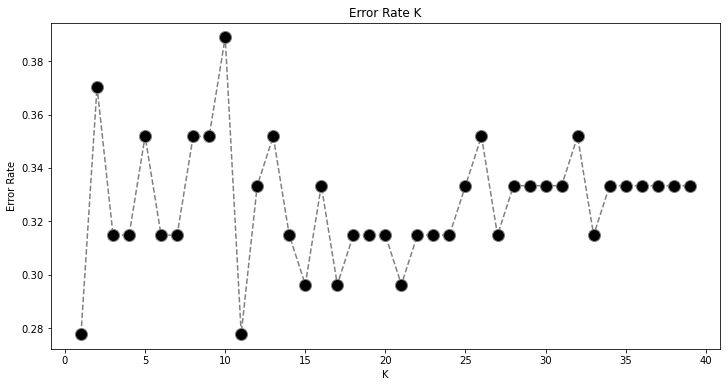

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color='gray', linestyle='dashed',
        marker='o', markerfacecolor='black', markersize=12)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [96]:
knn_11 = KNeighborsClassifier(n_neighbors=11)

knn_11.fit(X_train, y_train)

y_pred_11 = knn_11.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_11))

Accuracy: 0.7222222222222222


In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
knn_11 = KNeighborsClassifier(n_neighbors=11)

knn_11.fit(X_train_scaled, y_train)

y_pred_11_scaled = knn_11.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, y_pred_11_scaled))

Accuracy: 0.9814814814814815


In [102]:
y_pred_train = knn_11.predict(X_train_scaled)
y_pred_test = knn_11.predict(X_test_scaled)

In [103]:
print('Train Set\n')
print(classification_report(y_train, y_pred_train))
print('\n\nTest Set\n')
print(classification_report(y_test, y_pred_test))

Train Set

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.98      0.96      0.97        51
           2       1.00      1.00      1.00        32

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124



Test Set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.95      0.97        20
           2       0.94      1.00      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

